#圖片載入與預處理

### 載入圖片檔案
Keras的preprocesing.image模組可以幫助我們進行深度學習模型所需的圖片資料預處理。

圖片檔案將會轉換成NumPy陣列，即可輸入至網路模型的輸入層。

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import save_img
import matplotlib.pyplot as plt

In [ ]:
# 載入圖檔 （先將圖片上傳至colba虛擬機器上）
img = load_img("penguins.png")
# 顯示圖片資訊
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(505, 763)


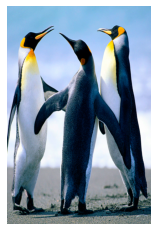

In [ ]:
# 顯示圖片
plt.axis("off")
plt.imshow(img)

In [ ]:
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)

float32
(763, 505, 3)


In [ ]:
img_array

array([[[127., 187., 224.],
        [130., 188., 224.],
        [128., 188., 219.],
        ...,
        [111., 174., 215.],
        [111., 174., 214.],
        [112., 176., 212.]],

       [[120., 185., 219.],
        [122., 185., 220.],
        [128., 187., 222.],
        ...,
        [112., 175., 216.],
        [111., 173., 214.],
        [112., 174., 213.]],

       [[128., 185., 218.],
        [126., 180., 218.],
        [122., 181., 222.],
        ...,
        [112., 175., 216.],
        [115., 172., 215.],
        [113., 171., 212.]],

       ...,

       [[108., 109., 115.],
        [129., 150., 136.],
        [116., 134., 126.],
        ...,
        [ 98., 122., 116.],
        [115., 120., 118.],
        [140., 145., 132.]],

       [[140., 146., 145.],
        [102., 129., 118.],
        [ 99., 117., 113.],
        ...,
        [ 71., 103., 111.],
        [119., 125., 124.],
        [138., 144., 134.]],

       [[150., 157., 152.],
        [ 86., 109., 107.],
        [102., 1

In [ ]:
# 將 Numpy 陣列轉換成 Image
img2 = array_to_img(img_array)
print(type(img2))

<class 'PIL.Image.Image'>


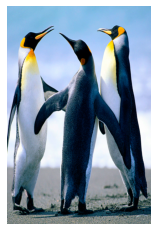

In [ ]:
# 顯示圖片
plt.axis("off")
plt.imshow(img2)

In [ ]:
#圖片載入時，可將其轉換成灰階圖像，並調整圖片尺寸
img = load_img("penguins.png", color_mode="grayscale", target_size=(227, 227))

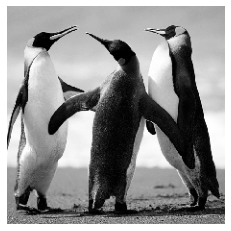

In [ ]:
# 顯示圖片
plt.axis("off")
plt.imshow(img, cmap="gray")

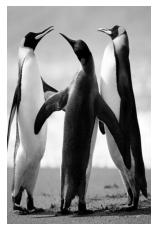

In [ ]:
# Keras可以使用save_img()函式將圖片的NumPy陣列儲存成圖檔

# 載入圖檔
img = load_img("penguins.png", color_mode="grayscale")
# 轉換成 Numpy 陣列
img_array = img_to_array(img)
# 儲存圖檔
save_img("penguins_grayscale.jpg", img_array)
# 載入圖片
img2 = load_img("penguins_grayscale.jpg")
# 顯示圖片
plt.axis("off")
plt.imshow(img2, cmap="gray")

### 資料增強 Data Augmentation
應用在影像辨識的資料增強，指的就是對圖片增強(Image Augmentation)的處理。當訓練資料集的圖片數量不足時，可以考慮使用圖片增強技術來擴增訓練資料集的數量。

圖片增強的概念在於，一張圖片經過剪裁、旋轉、縮放、調整比例和翻轉等處理後，對深度學習模型來說是一張全新的圖片。

在Keras裡，是以ImageDataGenerator物件來執行圖片增強

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [ ]:
img = load_img("koala.png") 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape)  # reshape (1, 707, 505, 3)
print(x.shape)

(1, 707, 505, 3)


In [ ]:
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True)

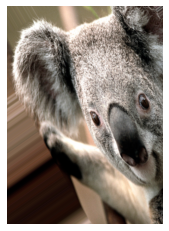

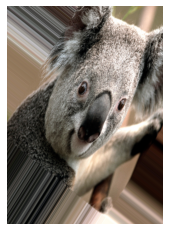

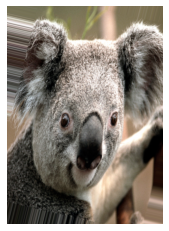

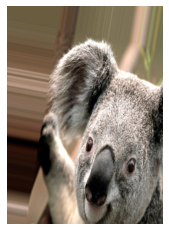

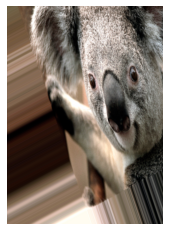

In [ ]:
i = 0
for batch_img in datagen.flow(x, batch_size=1,
                  save_to_dir="/content/", 
                  save_prefix="pen",
                  save_format="jpeg"):
  plt.axis("off")
  plt.imshow(batch_img[0].astype("int"))
  plt.show()
  i += 1
  if i >= 5:
    break 

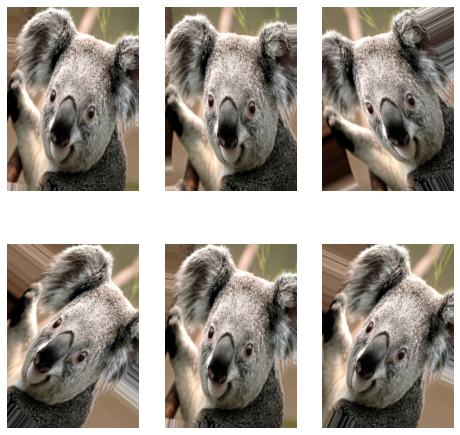

In [ ]:
# 圖片增強API的影像處理參數：旋轉 rotation_range
datagen = ImageDataGenerator(rotation_range=40)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

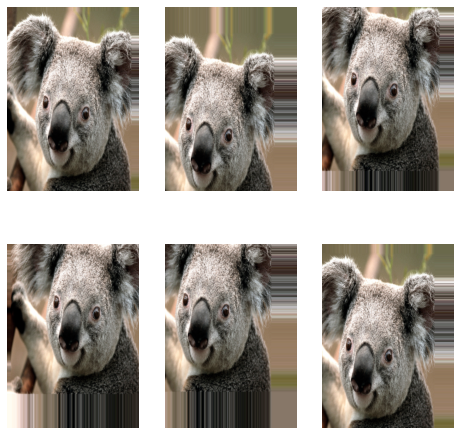

In [ ]:
# 圖片增強API的影像處理參數：位移/平移 width_shift_range, height_shift_range
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

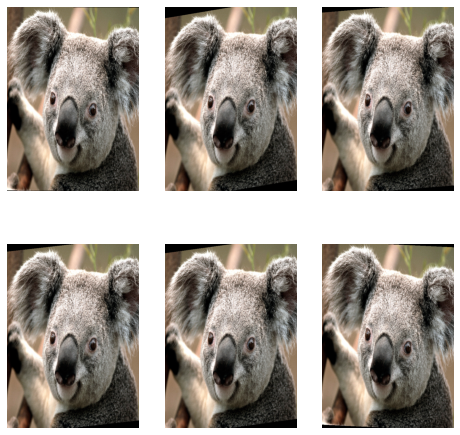

In [ ]:
# 圖片增強API的影像處理參數：推移 shear_range
datagen = ImageDataGenerator(shear_range=15, fill_mode="constant")

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

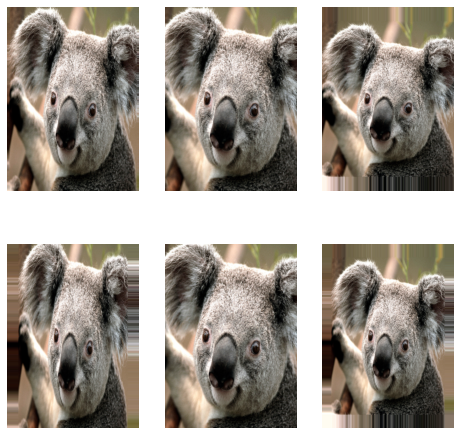

In [ ]:
# 圖片增強API的影像處理參數：縮放 zoom_range
datagen = ImageDataGenerator(zoom_range=0.2)

numOfImgs = 6
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(8,8))
for i in range(numOfImgs):
    plt.subplot(230+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

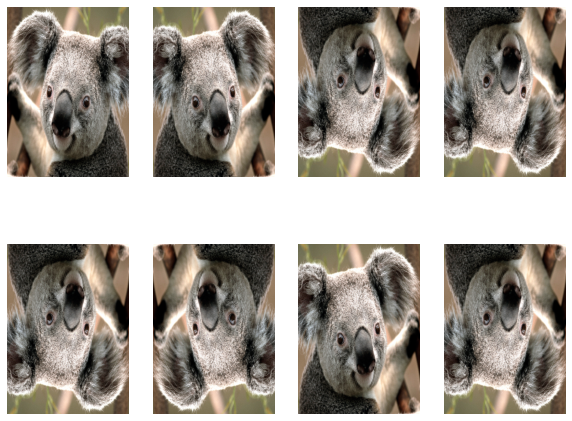

In [ ]:
# 圖片增強API的影像處理參數：翻轉 horizontal_flip, vertical_flip
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

numOfImgs = 8
i = 0
batch_imgs = []
for batch_img in datagen.flow(x, batch_size=1):
    batch_imgs.append(batch_img[0].astype("int"))
    i += 1
    if i >= numOfImgs:
        break 
    
plt.figure(figsize=(10,8))
for i in range(numOfImgs):
    plt.subplot(240+1+i)
    plt.axis("off")
    plt.imshow(batch_imgs[i])
plt.show()

#實作案例：Cifar-10資料集的小資料量圖片分類
當我們手邊的影像資料集數量很少時，為了提升分類結果的準確度，我們可以使用圖片增強技術來增加訓練資料量。

以下範例我們採用Cifar-10的資料集做為模擬，故意只取用少部分資料來做訓練。並比較使用了圖片增強前後，模型準確度的差異。

### 沒有使用圖片增強的小資料集圖片分類
取出Cifar-10前10000張圖片，當作是小資料量的圖片資料集

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
  permutation = list(np.random.permutation(a.shape[0]))
  shuffled_a = a[permutation]
  shuffled_b = b[permutation]
  
  return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)

# 取出前 20% 的訓練資料
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]
print(X_train_part.shape, Y_train_part.shape)

# 顯示每一種類別有幾筆資料
unique, counts = np.unique(Y_train_part, return_counts=True)
print(dict(zip(unique, counts)))

# 執行正規化, 從 0-255 至 0-1
X_train_part = X_train_part.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train_part = to_categorical(Y_train_part)
Y_test = to_categorical(Y_test)

170508288/170498071 [==============================] - 14s 0us/step
(10000, 32, 32, 3) (10000, 1)
{0: 1024, 1: 1008, 2: 999, 3: 1023, 4: 1004, 5: 978, 6: 993, 7: 999, 8: 986, 9: 986}


In [ ]:
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train_part, Y_train_part, validation_data=(X_test, Y_test), epochs=20, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Epoch 1/20
313/313 - 14s - loss: 1.8758 - accuracy: 0.3133 - val_loss: 1.5583 - val_accuracy: 0.4215 - 14s/epoch - 45ms/step
Epoch 2/20
313/313 - 2s - loss: 1.5355 - accuracy: 0.4471 - val_loss: 1.3494 - val_accuracy: 0.5104 - 2s/epoch - 6ms/step
Epoch 3/20
313/313 - 2s - loss: 1.3889 - accuracy: 0.4996 - val_loss: 1.2796 - val_accuracy: 0.5473 - 2s/epoch - 7ms/step
Epoch 4/20
313/313 - 2s - loss: 1.2980 - accuracy: 0.5342 - val_loss: 1.2474 - val_accuracy: 0.5497 - 2s/epoch - 7ms/step
Epoch 5/20
313/313 - 2s - loss: 1.2253 - accuracy: 0.5562 - val_loss: 1.1612 - val_accuracy: 0.5923 - 2s/epoch - 5ms/step
Epoch 6/20
313/313 - 2s - loss: 1.1443 - accuracy: 0.5904 - val_loss: 1.1737 - val_accuracy: 0.5749 - 2s/epoch - 5ms/step
Epoch 7/20
313/313 - 3s - loss: 1.0764 - accuracy: 0.6184 - val_loss: 1.1072 - val_accuracy: 0.6053 - 3s/epoch - 8ms/step
Epoch 8/20
313/313 - 2s - loss: 1.0281 - accuracy: 0.6320 - val_loss: 1.0677 - val_accuracy: 0.6223 - 2s/epoch - 7ms/step
Epoch 9/20
313/313 - 

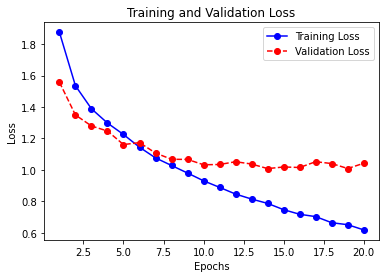

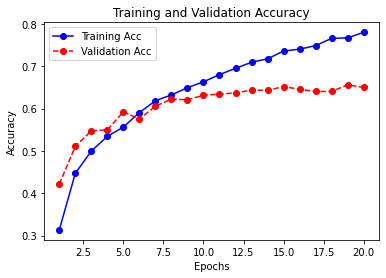

In [ ]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 使用圖片增強的小資料集圖片分類
同樣的小資料集，但是使用圖片增強技術，增加訓練集的資料量，在相同的CNN模型架構下，觀察訓練後的準確度有什麼變化。

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [ ]:
# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
  permutation = list(np.random.permutation(a.shape[0]))
  shuffled_a = a[permutation]
  shuffled_b = b[permutation]
  
  return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)

# 取出前 20% 的訓練資料
X_train_part = X_train[:10000]
Y_train_part = Y_train[:10000]

# 顯示每一種類別有幾筆資料
unique, counts = np.unique(Y_train_part, return_counts=True)
print(dict(zip(unique, counts)))

# 執行正規化, 從 0-255 至 0-1
X_test = X_test.astype("float32") / 255
# One-hot編碼
Y_train_part = to_categorical(Y_train_part)
Y_test = to_categorical(Y_test)

{0: 1024, 1: 1008, 2: 999, 3: 1023, 4: 1004, 5: 978, 6: 993, 7: 999, 8: 986, 9: 986}


In [ ]:
# 資料預處理 
#使用ImageDataGenerator物件進行圖片增強。其中參數有rescale，能執行資料正規化。
#然後呼叫flow()函式來產生訓練圖片的資料流

train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

train_generator = train_datagen.flow(
          X_train_part, Y_train_part,
          batch_size=16)

In [ ]:
# 定義模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",
                 input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [ ]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# 訓練模型 
#<特別注意> 在使用圖片增強技術時，是透過生成器的資料流產生增強的圖片（實際上並不存在），
#因此訓練模型時，輸入至模型的不是X_train_part, Y_train_part，而是資料流生成器train_generator
#fit()第一個參數表示要代入的是資料流為何
#fit()參數steps_per_epoch表示每一代訓練週期，要呼叫幾次train_generator
#由於資料流一次產生16張圖片，因此每一個訓練週期會讀進10000*16張訓練圖片
#所以訓練資料大幅增加之後，訓練時間也會隨之變久，請耐心等候

history = model.fit(
      train_generator,
      steps_per_epoch=10000,
      epochs=20, verbose=2,
      validation_data=(X_test, Y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10000/10000 - 105s - loss: 1.4245 - accuracy: 0.4868 - val_loss: 1.1505 - val_accuracy: 0.5894 - 105s/epoch - 10ms/step
Epoch 2/20
10000/10000 - 105s - loss: 1.1752 - accuracy: 0.5820 - val_loss: 0.9988 - val_accuracy: 0.6534 - 105s/epoch - 10ms/step
Epoch 3/20
10000/10000 - 105s - loss: 1.0884 - accuracy: 0.6150 - val_loss: 0.9713 - val_accuracy: 0.6551 - 105s/epoch - 10ms/step
Epoch 4/20
10000/10000 - 103s - loss: 1.0304 - accuracy: 0.6354 - val_loss: 1.0250 - val_accuracy: 0.6550 - 103s/epoch - 10ms/step
Epoch 5/20
10000/10000 - 104s - loss: 0.9938 - accuracy: 0.6474 - val_loss: 0.9284 - val_accuracy: 0.6732 - 104s/epoch - 10ms/step
Epoch 6/20
10000/10000 - 105s - loss: 0.9581 - accuracy: 0.6606 - val_loss: 1.0010 - val_accuracy: 0.6535 - 105s/epoch - 10ms/step
Epoch 7/20
10000/10000 - 103s - loss: 0.9274 - accuracy: 0.6716 - val_loss: 0.8780 - val_accuracy: 0.6974 - 103s/epoch - 10ms/step
Epoch 8/20
10000/10000 - 105s - loss: 0.9083 - accuracy: 0.6793 - val_loss: 0.8666 - val_accur

In [ ]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
測試資料集的準確度 = 0.71


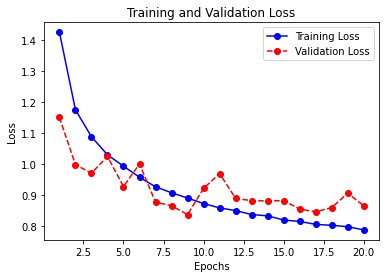

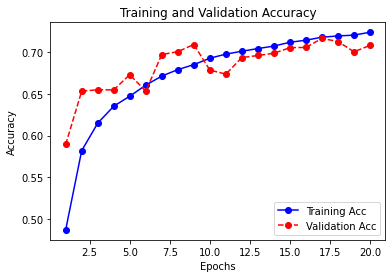

In [ ]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()